In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler 

In [5]:
df = pd.read_csv("StudentData.csv")
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [6]:
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [7]:
df.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [8]:
df.shape

(480, 17)

In [9]:
df.isnull()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
476,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
477,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
478,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# filling missing value using fillna()   
df.fillna(0) 

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [11]:
# calculate IQR for column raisedhands
Q1 = df['raisedhands'].quantile(0.25)
Q3 = df['raisedhands'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
# identify outliers
threshold = 1.5
outliers = df[(df['raisedhands'] < Q1 - threshold * IQR) | (df['raisedhands'] > Q3 + threshold * IQR)]
print(outliers)

59.25
Empty DataFrame
Columns: [gender, NationalITy, PlaceofBirth, StageID, GradeID, SectionID, Topic, Semester, Relation, raisedhands, VisITedResources, AnnouncementsView, Discussion, ParentAnsweringSurvey, ParentschoolSatisfaction, StudentAbsenceDays, Class]
Index: []


In [12]:
# calculate IQR for column Discussion
Q1 = df['Discussion'].quantile(0.25)
print(Q1)
Q3 = df['Discussion'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)
# identify outliers
threshold = 0.2
outliers2 = df[(df['Discussion'] < Q1 - threshold * IQR) | (df['Discussion'] > Q3 + threshold * IQR)]
print(outliers2)

20.0
70.0
50.0
    gender NationalITy PlaceofBirth       StageID GradeID SectionID  \
17       M          KW       KuwaIT  MiddleSchool    G-07         A   
18       F          KW       KuwaIT  MiddleSchool    G-07         A   
19       M          KW       KuwaIT  MiddleSchool    G-07         B   
20       F          KW       KuwaIT  MiddleSchool    G-07         A   
22       M          KW       KuwaIT  MiddleSchool    G-07         A   
..     ...         ...          ...           ...     ...       ...   
464      F      Jordan       Jordan  MiddleSchool    G-08         A   
465      F      Jordan       Jordan  MiddleSchool    G-08         A   
469      F      Jordan       Jordan  MiddleSchool    G-08         A   
474      F      Jordan       Jordan  MiddleSchool    G-08         A   
475      F      Jordan       Jordan  MiddleSchool    G-08         A   

         Topic Semester Relation  raisedhands  VisITedResources  \
17        Math        F   Father           55                13  

In [13]:
# drop rows containing outliers
df = df.drop(outliers2.index)

In [14]:
# replace outliers with median value
df.loc[z > threshold, 'Discussion'] = df['Discussion'].median()

NameError: name 'z' is not defined

Text(0.5, 20.80000000000002, 'VisITedResources')

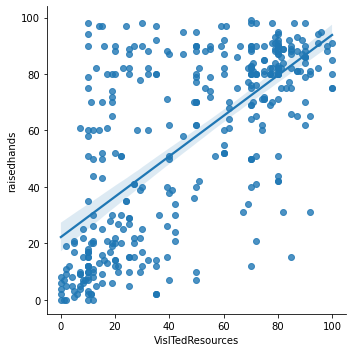

In [15]:
sns.lmplot(x="raisedhands", y="VisITedResources", data=df, order=1)
plt.ylabel('raisedhands')
plt.xlabel('VisITedResources')

In [16]:
# Creating an instance of the sklearn.preprocessing.MinMaxScaler() 
scaler = MinMaxScaler(feature_range=(0, 1)) 
  
# Scaling the Price column of the created dataFrame and storing 
# the result in ScaledPrice Column 
df[["ScaledDiscussion"]] = scaler.fit_transform(df[["Discussion"]]) 
  
print(df) 

    gender NationalITy PlaceofBirth       StageID GradeID SectionID    Topic  \
0        M          KW       KuwaIT    lowerlevel    G-04         A       IT   
1        M          KW       KuwaIT    lowerlevel    G-04         A       IT   
2        M          KW       KuwaIT    lowerlevel    G-04         A       IT   
3        M          KW       KuwaIT    lowerlevel    G-04         A       IT   
4        M          KW       KuwaIT    lowerlevel    G-04         A       IT   
..     ...         ...          ...           ...     ...       ...      ...   
473      M   Palestine    Palestine  MiddleSchool    G-08         A  Geology   
476      F      Jordan       Jordan  MiddleSchool    G-08         A  Geology   
477      F      Jordan       Jordan  MiddleSchool    G-08         A  Geology   
478      F      Jordan       Jordan  MiddleSchool    G-08         A  History   
479      F      Jordan       Jordan  MiddleSchool    G-08         A  History   

    Semester Relation  raisedhands  Vis

In [17]:

# find maximum value of a
# single column 'x'
maxClm = df['Discussion'].max()
print(maxClm)
minClm = df['Discussion'].min()
print(minClm)

80
10


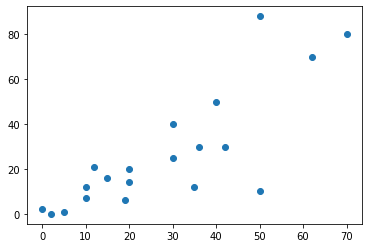

In [18]:
plt.scatter(df['raisedhands'][:20],df['VisITedResources'][:20])

In [33]:

X=df.drop('VisITedResources',axis=1)
y=df['VisITedResources']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
X=sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.2)
lr_model = sm.OLS(y_train, X_train).fit()
print(lr_model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).